# Batch Gradient Descent for Kings County, WA Housing Data

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 

In [2]:
''' Import cleaned housing data for Kings County, WA. '''
df = pd.read_csv("./data/Modified/houseClean_dates.csv", index_col=False)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter
0,0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,4
4,4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [3]:
# X = df[['bedrooms','sqft_living','grade']].values
# y = df['price'].values.reshape(-1,1)
# m = len(y)
# print(m)

In [4]:
''' Add a bias column to the input vector '''
# X = np.concatenate((np.ones((len(X), 1)), X), axis=1)
# X.shape

' Add a bias column to the input vector '

In [8]:
''' Transform input variables from dataframe to array object '''
X = df[['bedrooms','sqft_living','grade']].values

''' Add bias column to input vector '''
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)

''' Feature Scaling for Full Set '''
min_x = np.min(X[:, 1:])
max_x = np.max(X[:, 1:])
X[:, 1:] = (X[:, 1:] - min_x)/(max_x - min_x)
print(X.shape, X[:10, :])

(21613, 4) [[1.00000000e+00 2.21565731e-04 8.71491876e-02 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.89807976e-01 5.16986706e-04]
 [1.00000000e+00 1.47710487e-04 5.68685377e-02 4.43131462e-04]
 [1.00000000e+00 2.95420975e-04 1.44756278e-01 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.24076809e-01 5.90841950e-04]
 [1.00000000e+00 2.95420975e-04 4.00295421e-01 8.12407681e-04]
 [1.00000000e+00 2.21565731e-04 1.26661743e-01 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 7.82865583e-02 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.31462334e-01 5.16986706e-04]
 [1.00000000e+00 2.21565731e-04 1.39586411e-01 5.16986706e-04]]


In [35]:
''' Transform output variable from dataframe to array object '''
y = df['price'].values.reshape(-1,1)
m = len(y)

''' Feature Scaling for Output variable'''
max_y = np.max(y)
min_y = np.min(y)
y_normal = (y - min_y)/(max_y - min_y) 
y_normal[:10, 0]

array([0.01926557, 0.06072131, 0.01377049, 0.06937705, 0.05704918,
       0.15081967, 0.02393443, 0.02843934, 0.0202623 , 0.03252459])

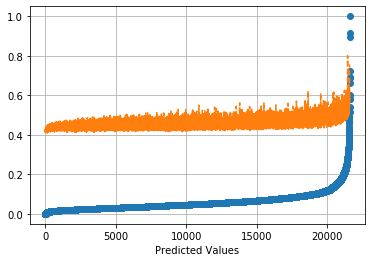

In [36]:
# Initial estimate of parameters
theta0 = np.zeros((X.shape[1],1))+0.4
#theta0 = np.array([[0],[0.5],[2],[0.5]])

ypred = X.dot(theta0)

index_sort = np.argsort(y_normal[:, 0]) # sort the values for better visualization
plt.plot(y_normal[index_sort, 0], 'o')
plt.plot(ypred[index_sort, 0], '--')
# plt.title()
plt.xlabel("Predicted Values")
# plt.ylabel()
plt.grid()
plt.show()

In [37]:
''' Gradient of the Cost Function Calculation '''
def grad_cost(theta):
    ''' dJ is the partial derivative of each mean-squared error with respect to all thetas '''
    dJ = (2/m) * np.sum((X.dot(theta) - y_normal) * X, axis=0).reshape(-1,1)
    return dJ

In [38]:
grad_cost(theta0)

array([[8.01551215e-01],
       [2.00422105e-04],
       [1.22228531e-01],
       [4.51298696e-04]])

In [39]:
''' MSE Cost Function for a Linear Regression Model '''
def cost(theta):
    ''' J is the mean squared error cost function '''
    J = np.sum((X.dot(theta) - y_normal)**2, axis=0)[0]
    return J

In [40]:
cost(theta0)

3497.856994392184

In [41]:
def batch_grad(theta0, eta, n_iters, TOL=1e-7):
    
    theta_history = [theta0]
    J_history = [cost(theta0)]
    
    theta_new = theta0 * n_iters
    print(f'epoch \t Cost(J) \t')
    
    for epoch in range(n_iters):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = grad(theta0)
        J = cost(theta0)
        
        theta_new = theta0 - (eta * dJ)
        theta_history.append(theta_new)
        J_history.append(J)
        
        if np.sum((theta_new - theta0)**2) < TOL:
            print('Convergence achieved.')
            break
        theta0 = theta_new

    return theta_new, theta_history, J_history

In [75]:
theta, theta_history, J_history = batch_grad(theta0, 0.02, 1000)
# theta, theta_history, J_history

epoch 	 Cost(J) 	
    0	3497.8570	
  100	85.5865	
Convergence achieved.


Text(0, 0.5, 'Cost')

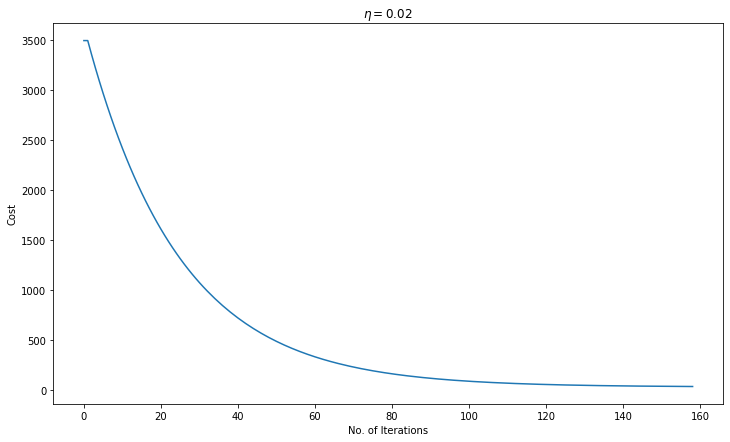

In [79]:
plt.plot(J_history)
plt.title("$\eta={0.02}$")
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

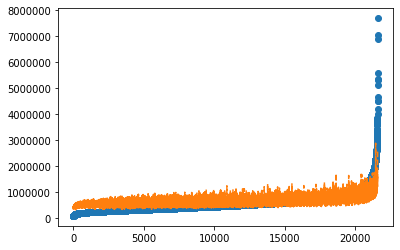

In [52]:
y_predict = X.dot(theta)

ypred = y_predict * (max_y - min_y) + min_y
plt.plot(y[index_sort, 0], 'o')
plt.plot(ypred[index_sort, 0], '--')

epoch 	 Cost(J) 	
    0	3497.8570	
  100	1284.0597	
  200	477.9809	
  300	189.1406	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
  100	480.2473	
  200	85.6211	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
  100	85.5865	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.
epoch 	 Cost(J) 	
    0	3497.8570	
Convergence achieved.


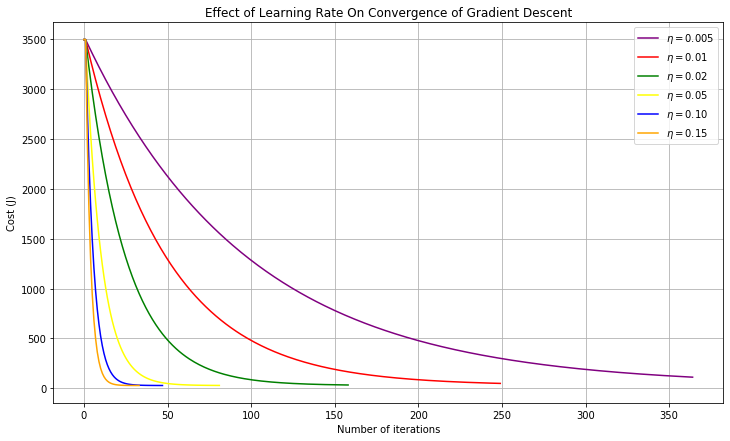

In [80]:
''' Plot Learning Rates '''
n_iters = 1000
theta = np.zeros(X.shape[1])

eta = 0.005;
theta_1, theta_history_1, J_history_1 = batch_grad(theta0, eta, n_iters)

eta = 0.01;
theta_2, theta_history_2, J_history_2 = batch_grad(theta0, eta, n_iters)

eta = 0.02;
theta_3, theta_history_3, J_history_3 = batch_grad(theta0, eta, n_iters)

eta = 0.05;
theta_4, theta_history_4, J_history_4 = batch_grad(theta0, eta, n_iters)

eta = 0.10;
theta_5, theta_history_5, J_history_5 = batch_grad(theta0, eta, n_iters)

eta = 0.15;
theta_6, theta_history_6, J_history_6 = batch_grad(theta0, eta, n_iters)

plt.plot(J_history_1, color ='purple', label = '$\eta = {0.005}$')
plt.plot(J_history_2, color ='red', label = '$\eta = {0.01}$')
plt.plot(J_history_3, color ='green', label = '$\eta = {0.02}$')
plt.plot(J_history_4, color ='yellow', label = '$\eta = {0.05}$')
plt.plot(J_history_5, color ='blue', label = '$\eta = {0.10}$')
plt.plot(J_history_6, color ='orange', label = '$\eta = {0.15}$')

plt.rcParams["figure.figsize"] = (12,7)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()
plt.savefig('./Visualizations/BGD_LearningRates.png')

In [82]:
def predict(x, theta):
    x_normal = (x - min_x)/(max_x - min_x)
    y_predict = x_normal.dot(theta)
    ypred = y_predict * (max_y - min_y) + min_y
    return ypred

In [86]:
''' Inputs for Prediction Function '''
x1 = np.array([1, 1, 900, 7])
x2 = np.array([1, 2, 1400, 7])
x3 = np.array([1, 3, 1850, 7])
x4 = np.array([1, 4, 2400, 7])

In [108]:
''' Provides Predicted Housing Price for a Learning Rate Value of 0.15 '''
inputs = [x1, x2, x3, x4]
price_pred = []
for input in inputs:
    prices = predict(input, theta_6).tolist()
    for price in prices:
        price_fin = price_pred.append('${:,.2f}'.format(price))
#         print(price_fin)
print(f"Predicted Housing Prices for Kings County, WA")
print(f" 1 Bedroom, 900 Sqft: : {price_pred[0]}")
print(f" 2 Bedroom, 1400 Sqft: : {price_pred[1]}")
print(f" 3 Bedroom, 1850 Sqft: : {price_pred[2]}")
print(f" 4 Bedroom, 2400 Sqft: : {price_pred[3]}")

Predicted Housing Prices for Kings County, WA
 1 Bedroom, 900 Sqft: : $250,818.39
 2 Bedroom, 1400 Sqft: : $347,716.80
 3 Bedroom, 1850 Sqft: : $434,947.90
 4 Bedroom, 2400 Sqft: : $541,513.63


In [84]:
from scipy.stats import pearsonr

pearson_coef = pearsonr(ypred.reshape(-1),y.reshape(-1))
print(f"R2, P-Value: {pearson_coef}")

R2, P-Value: (0.7021229631869237, 0.0)
